<a href="https://colab.research.google.com/github/Masoomas98/DSPS_MSarfraz/blob/main/Homeworks/%20Homework6/%20HMW6_DSPS_gaussian_process_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.datasets import elnino
from scipy.optimize import minimize
import calendar
!pip install george
import george
from george import kernels

# 0. The Dataset

We'll be using the El Niño dataset from the `statsmodels` package. This first cell of code loads the dataset easily for you. Read the description of the dataset [here](https://www.statsmodels.org/devel/datasets/generated/elnino.html).

In [2]:
def load_elnino_dataset():
    """
    Downloads the El Niño dataset from the statsmodels package.

    Parameters
    ----------
    None

    Returns
    -------
    df : pd.DataFrame
        A Pandas dataframe containing the raw data of the El Niño dataset
        directly from the statsmodels package.
    """
    df = elnino.load_pandas().data
    return df

df = load_elnino_dataset()

In [3]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2006.0,24.76,26.52,26.22,24.29,23.84,22.82,22.20,21.89,21.93,22.46,22.61,24.15
57,2007.0,25.82,26.81,26.41,24.96,23.05,21.61,21.05,19.95,19.85,19.31,19.82,21.15
58,2008.0,24.24,26.39,26.91,25.68,24.43,23.19,23.02,22.14,21.60,21.39,21.54,22.73
59,2009.0,24.39,25.53,25.48,25.84,24.95,24.09,23.09,22.03,21.48,21.64,21.99,23.21


In [4]:
df['YEAR'].values


array([1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009., 2010.])

In [5]:
def flatten_dataset(df):
    """
    Flatten the data in the dataframe.

    The sea surface temperature data is stored in a somewhat peculiar way in
    this dataset. The data has rows for every year between 1950 and 2010, and
    it has 12 columns for each month of each year.

    Re-order the data such that there is one 1-dim array for the temperature data.

    Parameters
    ----------
    df : pd.DataFrame
        The Pandas dataframe of the El Niño – Sea Surface Temperature dataset
        from the statsmodels package.

    Returns
    -------
    time : array-like
        A shape (732,) array containing every month from January 1950 to
        December 2010. You may encode the time as an integer
        (`time = [0, 1, 2, 3, ...]), as strings (`time = ['January 1950', ...])
        or however else you like.
    data : array-like
        A shape (732,) array containing the sea surface temperature for every
        month between January 1950 to December 2010.
    """
    times = []
    data = []

    # Loop through the data to get time and temperature values
    for idx, row in df.iterrows():
      year = int(row['YEAR'])
      for month in range(1, 13):
        month_name = df.columns[month]
        time_label = f"{month_name} {year}"
        temperature = row[month_name]

        times.append(time_label)
        data.append(temperature)

    return times, data
    raise NotImplementedError()

x, y = flatten_dataset(df)

In [6]:
x, y = flatten_dataset(df)

In [7]:
import datetime
x_new = [datetime.datetime.strptime(month_year, '%b %Y').strftime('%B %Y') for month_year in x]

In [8]:
#x_new

In [9]:
len(y), len(x_new)

(732, 732)

# 1. Visualize

In [10]:
import seaborn as sns

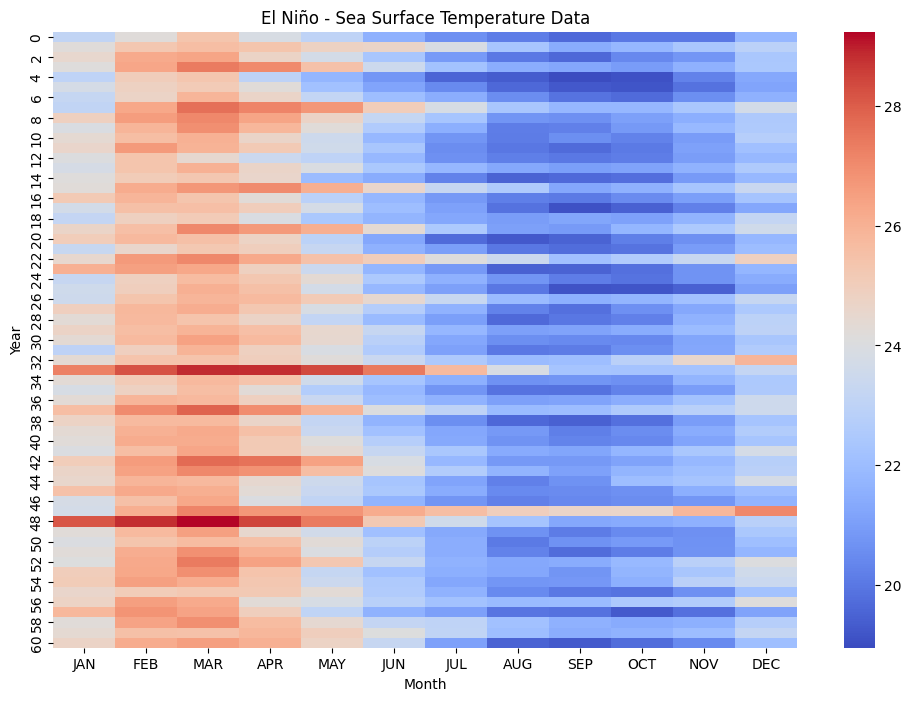

In [11]:
def visualize(df):
    """
    Visualize the El Niño – Sea Surface Temperature dataset.

    You decide the most appropriate way to visualize the dataset.

    Parameters
    ----------
    df : pd.DataFrame
        The Pandas dataframe of the El Niño – Sea Surface Temperature dataset
        from the statsmodels package.

    Returns
    -------
    None
    """



def visualize(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.iloc[:, 1:], cmap="coolwarm", cbar=True)
    plt.xlabel("Month")
    plt.ylabel("Year")
    plt.title("El Niño - Sea Surface Temperature Data")
    plt.show()
    return
    raise NotImplementedError()
# Call the visualize function with your DataFrame
visualize(df)




Figure 1: Visualizing heat map for surface temperatures, The y axis has values 60 to 0, basically 0 corrresponds to the starting year 1950 and 60 corresponds to 2010 here. So this plot shows the variation of tempertaure throughout the year for each month plotted vs. each year. The data show periodicity throughout each year. This gives an insight for what kernel to use later on.

## Other visualisations:
* Including a box plot to see the surface temperature varying through the months for all years.


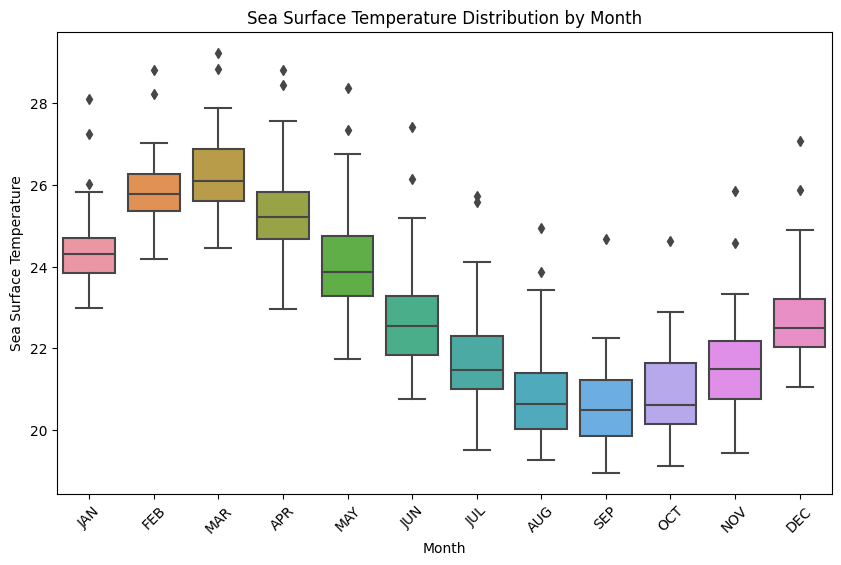

In [12]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, 1:])
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Sea Surface Temperature')
plt.title('Sea Surface Temperature Distribution by Month')
plt.show()


Figure 2: A box plot also shows sin wave of heat temperatures throught the 12 months for each year. Just extra visuals.

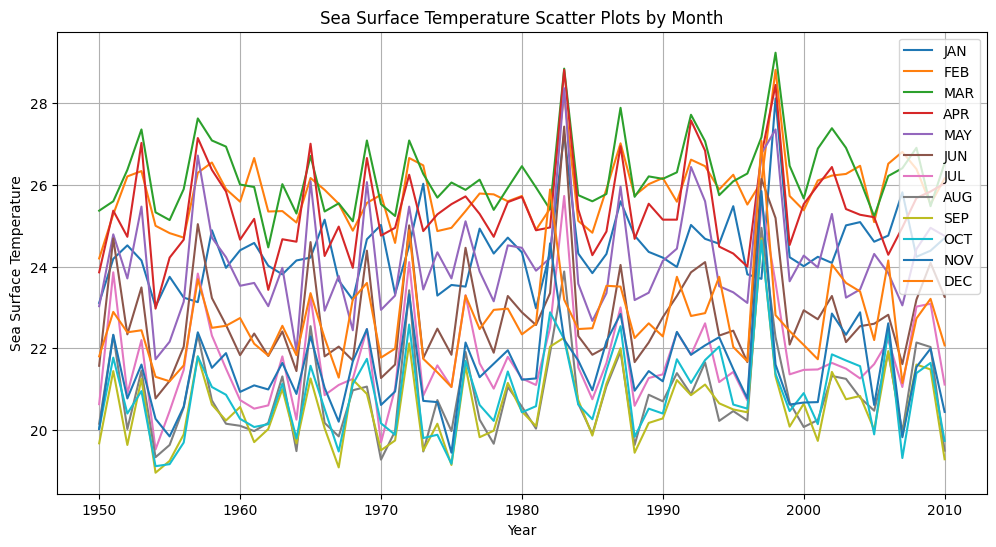

In [13]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the dataset
months = df.columns[1:]  # Extract the column names for months (excluding 'YEAR')

plt.figure(figsize=(12, 6))

for month in months:
    plt.plot(df['YEAR'], df[month], label=month)

plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature')
plt.title('Sea Surface Temperature Scatter Plots by Month')
plt.legend(loc='upper right')
plt.grid()
plt.show()


Figure 3: This figure is so populated and confusing! so I will make scatter plots for each month as a function of all the years.

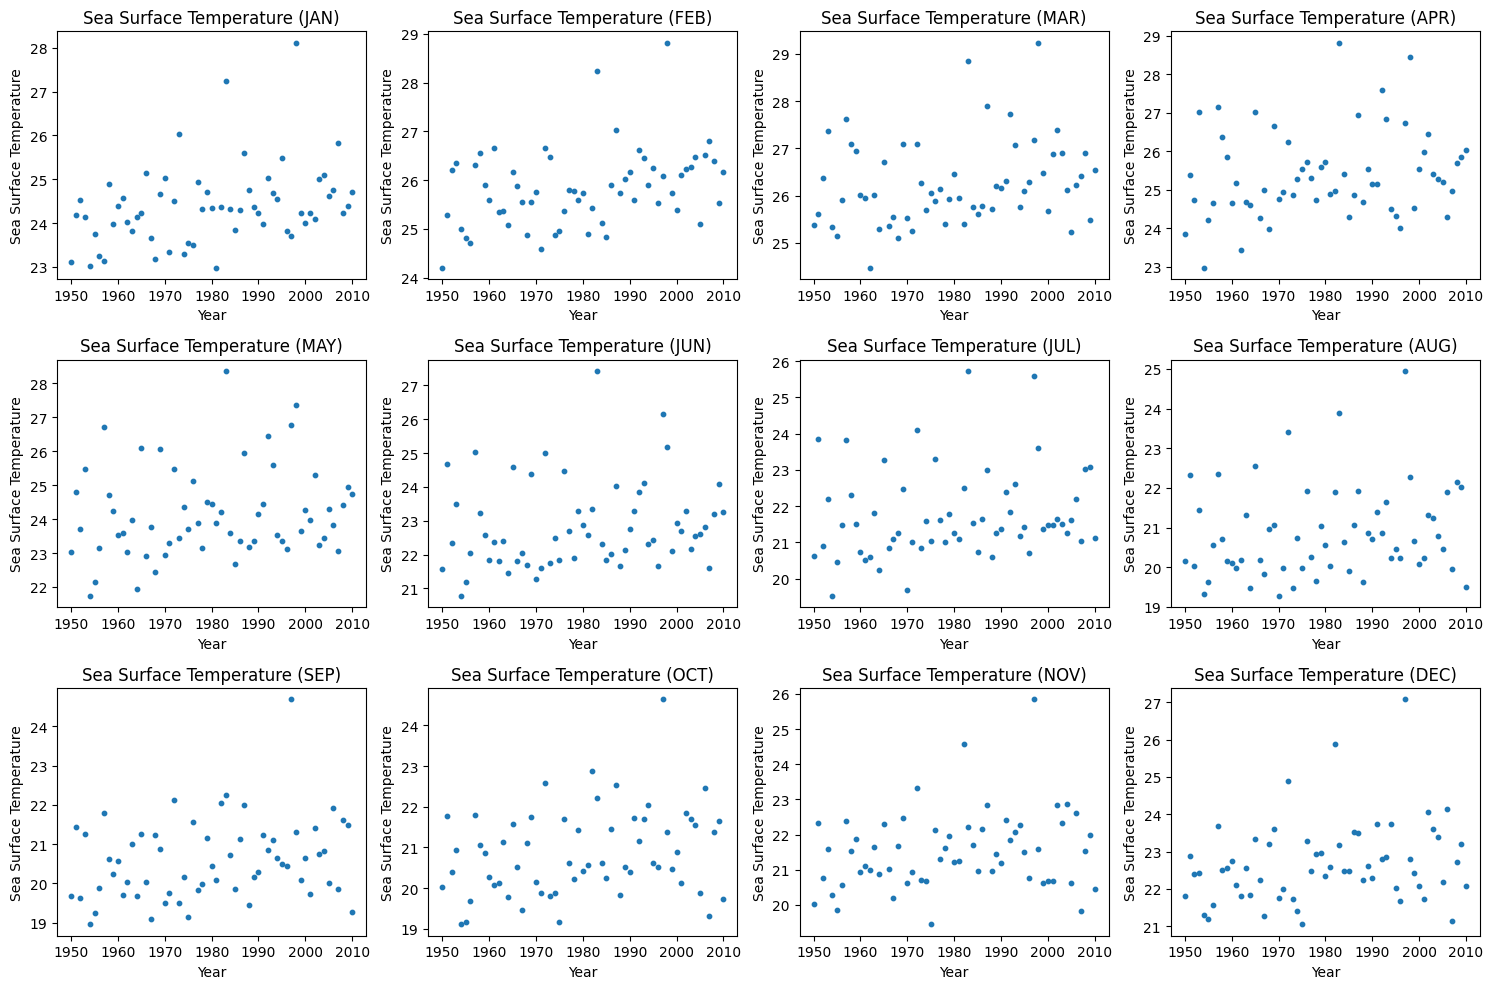

In [14]:
months = df.columns[1:]  # Extract the column names for months (excluding 'YEAR')

num_months = len(months)
num_rows = 3  # Number of rows in the grid
num_cols = 4 #the number of columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, month in enumerate(months):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.scatter(df['YEAR'], df[month], label=month, s=10)
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Surface Temperature')
    ax.set_title(f'Sea Surface Temperature ({month})')



plt.tight_layout()
plt.show()


Figure 4: Again another visual for the data and how surface temperature varies throughout for 12 months in all the years.

# 2. Gaussian Process Regression (GPR)

In [15]:
def get_interpolated_time(start, end, interval):
    """
    We are going to use GPR to interpolate the sea surface temperatures for
    every day between January 1st 1950 and December 1st 2030. There are 29,555
    days between those two dates (inclusive). Create and return an array of
    times for each day in that timeframe.

    Paramters:
    start = 1950 Januray
    end = 2030 December

    Returns:
    interp_time : array-like
        A shape (29555,) array, the times we want to interpolate.
    """
    start_time =np.datetime64(start)
    end_time =np.datetime64(end)
    interp_time = np.arange(start_time, end_time, np.timedelta64(interval, 'D'), dtype='datetime64[D]')
    return interp_time
    raise NotImplementedError()



In [16]:
start = '1950-01-01'
end = '2030-12-01'
interval = 1 # corresponds to one day
t_interp =get_interpolated_time(start,end,interval)


In [17]:
t_interp = pd.to_datetime(t_interp, format = '%Y-%m-%d', errors = 'coerce')
t_interp = pd.date_range(t_interp.min(),t_interp.max(), freq ='D')

In [18]:
t_interp

DatetimeIndex(['1950-01-01', '1950-01-02', '1950-01-03', '1950-01-04',
               '1950-01-05', '1950-01-06', '1950-01-07', '1950-01-08',
               '1950-01-09', '1950-01-10',
               ...
               '2030-11-21', '2030-11-22', '2030-11-23', '2030-11-24',
               '2030-11-25', '2030-11-26', '2030-11-27', '2030-11-28',
               '2030-11-29', '2030-11-30'],
              dtype='datetime64[ns]', length=29554, freq='D')

Changing the interp time to days starting from january 1 1950 to december 1 2030.

In [19]:
import pandas as pd

# Assuming you have a DatetimeIndex
date_range = pd.date_range(start="1950-01-01", end="2030-11-30")

# Convert the DatetimeIndex to numeric day values
t_interpn = [(date - date_range[0]).days + 1 for date in date_range]

# Example usage:
print(t_interpn)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

* In the cells below i changed the time from Januray 1 , 1950 to december 1, 2010, into days by counting days fro the first date and taking the day number form 1st day of each month until 2010.

In [20]:
from datetime import datetime

def date_to_day_number(date):
    # Parse the date string and extract month and year
    date_obj = datetime.strptime(date, "%B %Y")
    year = date_obj.year
    month = date_obj.month

    # Calculate the number of days since January 1950
    start_date = datetime(1950, 1, 1)
    day_number = (date_obj - start_date).days + 1

    return day_number

# Example usage:
date = 'March 1950'
day_number = date_to_day_number(date)
print(f"{date} is day {day_number}")


March 1950 is day 60


In [21]:
# Create an array of day numbers for the 1st day of every month from 1950 to 2010
day_numbers = []
current_date = datetime(1950, 1, 1)
end_date = datetime(2010, 12, 1)

while current_date <= end_date:
    date_str = current_date.strftime("%B %Y")
    day_numbers.append(date_to_day_number(date_str))
    # Move to the next month
    if current_date.month == 12:
        current_date = datetime(current_date.year + 1, 1, 1)
    else:
        current_date = datetime(current_date.year, current_date.month + 1, 1)

# Example usage:
print(day_numbers)

[1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 366, 397, 425, 456, 486, 517, 547, 578, 609, 639, 670, 700, 731, 762, 791, 822, 852, 883, 913, 944, 975, 1005, 1036, 1066, 1097, 1128, 1156, 1187, 1217, 1248, 1278, 1309, 1340, 1370, 1401, 1431, 1462, 1493, 1521, 1552, 1582, 1613, 1643, 1674, 1705, 1735, 1766, 1796, 1827, 1858, 1886, 1917, 1947, 1978, 2008, 2039, 2070, 2100, 2131, 2161, 2192, 2223, 2252, 2283, 2313, 2344, 2374, 2405, 2436, 2466, 2497, 2527, 2558, 2589, 2617, 2648, 2678, 2709, 2739, 2770, 2801, 2831, 2862, 2892, 2923, 2954, 2982, 3013, 3043, 3074, 3104, 3135, 3166, 3196, 3227, 3257, 3288, 3319, 3347, 3378, 3408, 3439, 3469, 3500, 3531, 3561, 3592, 3622, 3653, 3684, 3713, 3744, 3774, 3805, 3835, 3866, 3897, 3927, 3958, 3988, 4019, 4050, 4078, 4109, 4139, 4170, 4200, 4231, 4262, 4292, 4323, 4353, 4384, 4415, 4443, 4474, 4504, 4535, 4565, 4596, 4627, 4657, 4688, 4718, 4749, 4780, 4808, 4839, 4869, 4900, 4930, 4961, 4992, 5022, 5053, 5083, 5114, 5145, 5174, 5205, 5235,

In [22]:
np.save('x.npy', day_numbers)
np.save('y.npy', y)
np.save('interp_time', t_interpn)

In [23]:
day_numbers = np.asarray(day_numbers)
t_interpn = np.asarray(t_interpn)

At this point the interp time and the orginal time for dataset is just numeric days

OrderedDict([('mean:value', 23.09262295081967), ('kernel:k1:log_constant', 1.6168480842330673), ('kernel:k2:metric:log_M_0_0', 10.308952660644293)])


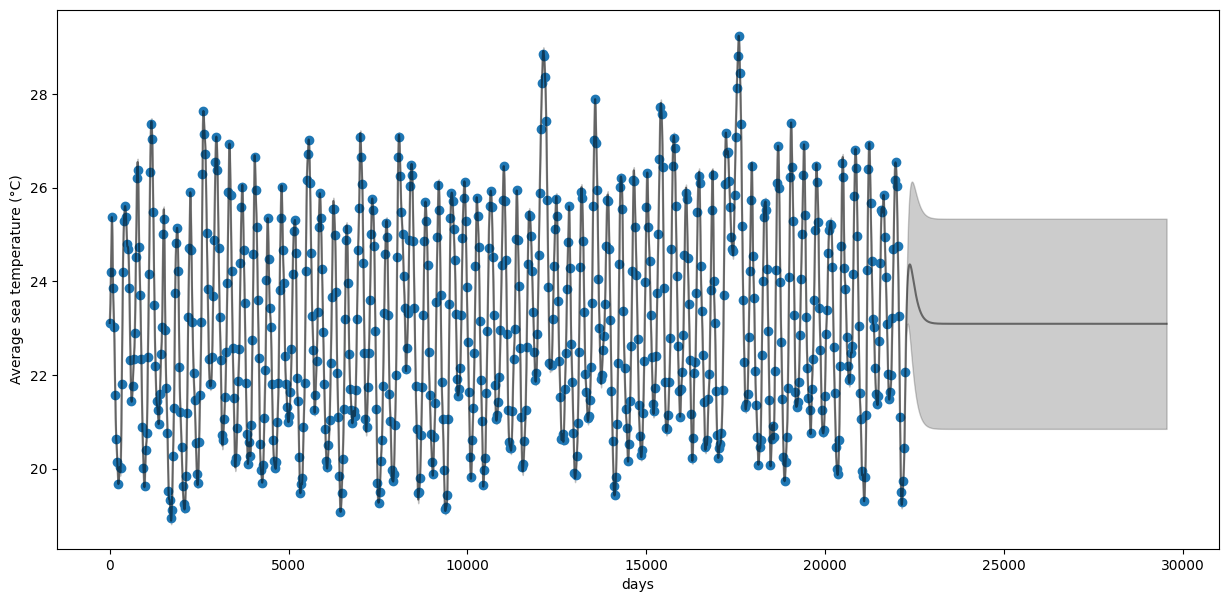

In [24]:
def gaussian_process_regression(time, data, interp_time, initial_guess):
    """
    Using the george package, its documentation and startup guide, implement a
    gaussian process regressor on `time` and `data`. Then, use it to predict
    on `interp_time`.
    It will be helpful for you to write code to visualize the result of this
    initial model, but not necessary for the assignment.
    Parameters
    ----------
    time : array-like
        A shape (732,) array, times between 1950 and 2010, sampled every month.
    data : array-like
        A shape (732,) array, sea surface temperatures every month between 1950
        and 2010.
    interp_time : array-like
        A shape (29555,) array, times between 1950 and 2030, sampled every day.
    initial_guess : array-like or float
        The intial guess for the gaussian process that you make. The number of
        parameters will depend on the kernel you choose.
    Returns
    -------
    None
    """
    plt.figure(figsize = (15,7))
    #kernel = np.var(data) * kernels.ExpSquaredKernel(initial_guess)
    kernel = np.var(data) * kernels.Matern32Kernel(initial_guess)
    gp = george.GP(kernel, mean=np.mean(data), fit_mean=True)
    gp.compute(time)
    preds, pred_var = gp.predict(data, interp_time, return_var=True)
    print(gp.get_parameter_dict())
    plt.fill_between(interp_time, preds - np.sqrt(pred_var), preds + np.sqrt(pred_var),
                    color="k", alpha=0.2)
    plt.plot(interp_time, preds, "k", lw=1.5, alpha=0.5)
    plt.scatter(time, data)

    plt.xlabel("days")
    plt.ylabel("Average sea temperature (°C)");
    return gp
initial_guess = 30000
test = gaussian_process_regression(day_numbers, y, t_interpn, initial_guess)

Figure 5: Plot of the given data fitted with the Gaussian regression process.  The fit is pretty good until it has to be predicted beyond 2010 time, which shows increase in temperature then a decrease.

The two cells below are just me checking if stuff is going fine.

In [25]:
norm_x = (day_numbers-np.min(day_numbers))/(np.max(day_numbers)-np.min(day_numbers))
norm_tinterp = (t_interpn - np.min(t_interpn))/(np.max(t_interpn)-np.min(t_interpn))
# Create a GP regressor

In [26]:
for i in range(len(norm_tinterp)):
  if np.isnan(norm_tinterp[i]):
    print("true")
  #else:
    #print("false")



# 3. Optimize

In [28]:
def optimize(gp):
    """
    Using any optimization method you choose, find the optimal set of
    hyperparameters for your model.

    Print the results of your optimization.

    Parameters
    ----------
    ...

    Returns
    -------
    None
    """



    def neg_ln_like(p):
      gp.set_parameter_vector(p)
      return -gp.log_likelihood(y)

    def grad_neg_ln_like(p):
      gp.set_parameter_vector(p)
      return -gp.grad_log_likelihood(y)

    result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
    print(result)
    gp.set_parameter_vector(result.x)
    tests = test.get_parameter_dict()

    print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

    return gp
initial_guess = 30000
optimize(test)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 774.2043417494014
        x: [ 2.308e+01  2.107e+00  9.963e+00]
      nit: 0
      jac: [ 3.317e-08 -5.125e-07  6.133e-07]
 hess_inv: [[1 0 0]
            [0 1 0]
            [0 0 1]]
     nfev: 1
     njev: 1

Final ln-likelihood: -774.20


In [29]:
test.get_parameter_dict()

OrderedDict([('mean:value', 23.078934459763925),
             ('kernel:k1:log_constant', 2.107109808845624),
             ('kernel:k2:metric:log_M_0_0', 9.962812433589683)])

# 4. Visualize your model

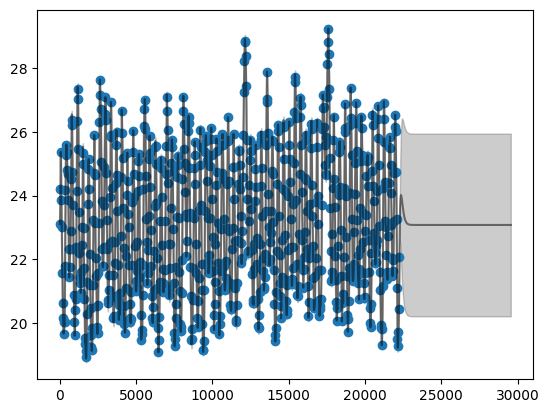

In [30]:
def visualize_model(data, interp_time, time):
    """
    Visualize your model. Use any method you like in visualizing your model but
    you must make at least one plot with a figure caption. Your
    visualization must also plot the uncertainties from the GP model.

    In your figure caption, comment on the effectiveness of your model in
    predicting temperatures beyond 2010.

    Parameters
    ----------


    Returns
    -------

    """
    pred, pred_var = test.predict(data, interp_time, return_var=True)

    plt.fill_between(interp_time, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="k", alpha=0.2)
    plt.plot(interp_time, pred, "k", lw=1.5, alpha=0.5)
    plt.scatter(time, data)


visualize_model(y,t_interpn, day_numbers)

Figure 6: Exact same result with slight variation is guess, negligble, so optimization in my knowledge failed to extrapolate beyond 2010 years, also i tried different kernels only this one helped me to get this tiny wiggle.

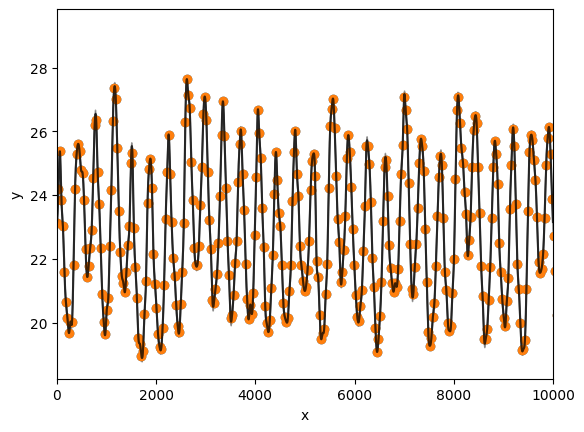

In [31]:
def visualize_model(data, interp_time, time):
    """
    Visualize your model. Use any method you like in visualizing your model but
    you must make at least one plot with a figure caption. Your
    visualization must also plot the uncertainties from the GP model.

    In your figure caption, comment on the effectiveness of your model in
    predicting temperatures beyond 2010.

    Parameters
    ----------


    Returns
    -------

    """
    pred, pred_var = test.predict(data, interp_time, return_var=True)

    plt.fill_between(interp_time, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="k", alpha=0.2)
    plt.plot(interp_time, pred, "k", lw=1.5, alpha=0.5)
    plt.scatter(time, data)

    #pl.xlim(0, 10)
    #pl.ylim(-1.45, 1.45)
    plt.xlabel("x")
    plt.ylabel("y")

    plt.fill_between(t_interpn, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                    color="k", alpha=0.2)
    plt.plot(t_interpn, pred, "k", lw=1.5, alpha=0.5)
    plt.scatter(time, data)

    plt.xlim(0, 10000)
    #pl.ylim(-1.45, 1.45)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

visualize_model(y,t_interpn, day_numbers)

Figure 7: Just to zoom in and see the correlation of data with the predictions, again it seems like it performs well, the interpolation within the given data range.